# Gender Pay Gap Analysis

## Importing libraries

In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

## Importing dataset

In [2]:
glassdoor = pd.read_csv("data/Glassdoor Gender Pay Gap.csv")

## Understanding dataset

In [3]:
glassdoor.shape

(1000, 9)

In [4]:
glassdoor.head(10)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
5,IT,Female,20,5,PhD,Operations,4,70890,10126
6,Graphic Designer,Female,20,5,College,Sales,4,67585,10541
7,Software Engineer,Male,18,4,PhD,Engineering,5,97523,10240
8,Graphic Designer,Female,33,5,High School,Engineering,5,112976,9836
9,Sales Associate,Female,35,5,College,Engineering,5,106524,9941


In [5]:
glassdoor.dtypes

JobTitle     object
Gender       object
Age           int64
PerfEval      int64
Education    object
Dept         object
Seniority     int64
BasePay       int64
Bonus         int64
dtype: object

In [6]:
glassdoor.isna().sum()

JobTitle     0
Gender       0
Age          0
PerfEval     0
Education    0
Dept         0
Seniority    0
BasePay      0
Bonus        0
dtype: int64

In [7]:
glassdoor.describe(include='all')

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
count,1000,1000,1000.000000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000
unique,10,2,NaN,NaN,4,5,NaN,NaN,NaN
top,Marketing Associate,Male,NaN,NaN,High School,Operations,NaN,NaN,NaN
freq,118,532,NaN,NaN,265,210,NaN,NaN,NaN
mean,NaN,NaN,41.393000,3.037000,NaN,NaN,2.971000,94472.653000,6467.161000
std,NaN,NaN,14.294856,1.423959,NaN,NaN,1.395029,25337.493272,2004.377365
min,NaN,NaN,18.000000,1.000000,NaN,NaN,1.000000,34208.000000,1703.000000
25%,NaN,NaN,29.000000,2.000000,NaN,NaN,2.000000,76850.250000,4849.500000
50%,NaN,NaN,41.000000,3.000000,NaN,NaN,3.000000,93327.500000,6507.000000
75%,NaN,NaN,54.250000,4.000000,NaN,NaN,4.000000,111558.000000,8026.000000


## Visualizing some of the data already

<AxesSubplot:>

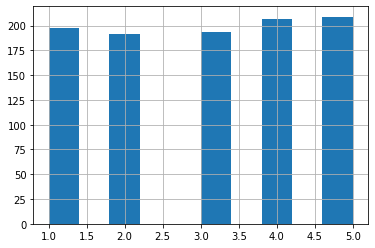

In [8]:
glassdoor.PerfEval.hist()

<AxesSubplot:>

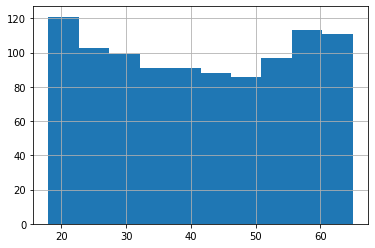

In [9]:
glassdoor.Age.hist()

<AxesSubplot:>

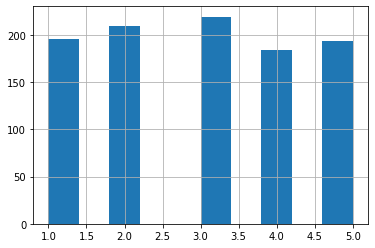

In [10]:
glassdoor.Seniority.hist()

<AxesSubplot:>

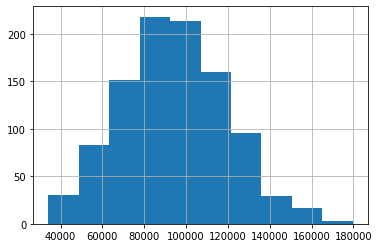

In [11]:
glassdoor.BasePay.hist()

<AxesSubplot:>

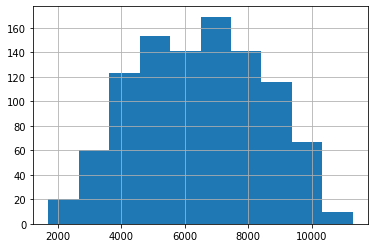

In [12]:
glassdoor.Bonus.hist()

## Understanding how variables are connected

<AxesSubplot:>

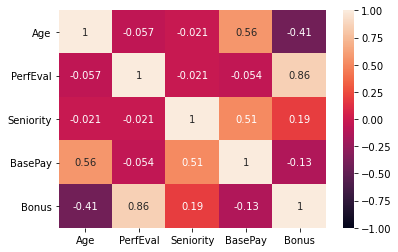

In [13]:
sns.heatmap(glassdoor.corr(), vmin=-1.0, annot=True)

**3 main relations are observed here:**
1. The Bonus Paid is highly correlated to the PerfEval.
2. The Age highly influences the BasePay
3. The seniority is also highly correlated to the BasePay as well

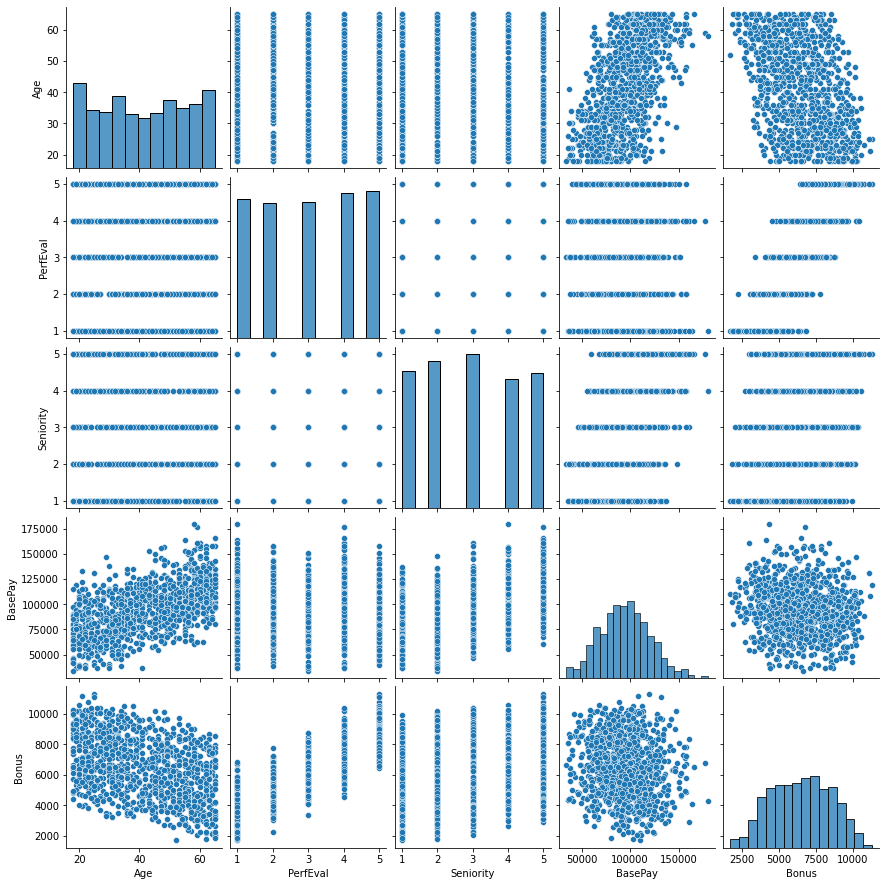

In [14]:
sns.pairplot(glassdoor)

# Visualizations

<AxesSubplot:xlabel='Age', ylabel='BasePay'>

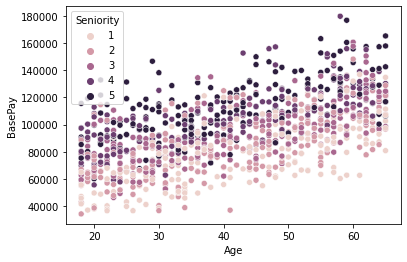

In [35]:
sns.scatterplot(x="Age",y="BasePay",hue="Seniority",data=glassdoor)

In [ ]:
sns.scatterplot(x="Age",y="BasePay",hue="Seniority",data=glassdoor)

## Breakingdown some analysis

<AxesSubplot:xlabel='PerfEval', ylabel='Bonus'>

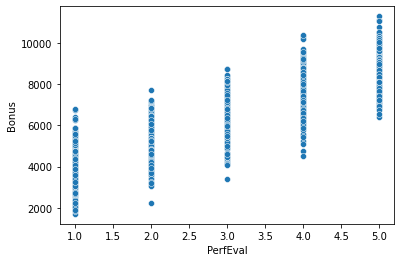

In [23]:
sns.scatterplot(x="PerfEval",y="Bonus",data=glassdoor)

### Gender gap

In [15]:
glassdoor.groupby("Gender").mean()

,Age,PerfEval,Seniority,BasePay,Bonus
Gender,,,,,
Female,41.829060,2.935897,3.012821,89942.818376,6474.012821
Male,41.009398,3.125940,2.934211,98457.545113,6461.133459


##### Testing hypothesis to verify statistical significance of PerfEval:

$H_0$: female **"Performance Evaluation"** has the same average than Male evaluation.

$H_1$: female **"Performance Evaluation"** is lower than Male evaluation.

In [32]:
ttest_ind(glassdoor[glassdoor.Gender=="Female"]["PerfEval"],glassdoor[glassdoor.Gender=="Male"]["PerfEval"])

Ttest_indResult(statistic=-2.109504592611216, pvalue=0.03514956532606961)

We may reject the Null Hypothesis and conclude that **Female "Performance Evaluation" is lower than Male "Performance Evaluation" with confidence level of 7%.**

##### Testing hypothesis to verify statistical significance of BasePay:

$H_0$: female **"Base Pay"** has the same average than Male evaluation.

$H_1$: female **"Base Pay"** is lower than Male evaluation.

In [33]:
ttest_ind(glassdoor[glassdoor.Gender=="Female"]["BasePay"], glassdoor[glassdoor.Gender=="Male"]["BasePay"])

Ttest_indResult(statistic=-5.376104124176958, pvalue=9.478621943012633e-08)

We may reject the Null Hypothesis and conclude that **Female "Performance Evaluation" is lower than Male and statistically significance, since $pvalue <<$ Confidence Level of 5%.**

##### Testing hypothesis to verify statistical significance of BasePay:

$H_0$: female **"Bonus"** has the same average than Male evaluation.

$H_1$: female **"Bonus"** is lower than Male evaluation with 10% confidence level.

In [34]:
ttest_ind(glassdoor[glassdoor.Gender=="Female"]["Bonus"], glassdoor[glassdoor.Gender=="Male"]["Bonus"])

Ttest_indResult(statistic=0.10133940723793167, pvalue=0.919301390176108)

We cannot reject the null hypothesis and therefore reject the alternative hypothesis, since the pvalue is very significant and the difference of mean is very low. Statistically speaking, they are very similar and doesn't present significant difference one from another.

### Gap by JobTitle

In [16]:
glassdoor.groupby("JobTitle").mean()

,Age,PerfEval,Seniority,BasePay,Bonus
JobTitle,,,,,
Data Scientist,41.383178,2.971963,2.953271,92433.420561,6484.990654
Driver,42.175824,3.065934,2.945055,89382.208791,6396.681319
Financial Analyst,40.794393,3.271028,2.943925,94996.878505,6406.747664
Graphic Designer,40.673469,3.122449,3.112245,90892.530612,6782.000000
IT,42.187500,3.125000,2.875000,90737.468750,6292.927083
Manager,42.533333,2.700000,2.911111,125329.600000,6062.577778
Marketing Associate,41.652542,2.923729,3.042373,76656.372881,6145.754237
Sales Associate,42.404255,2.797872,2.968085,93396.489362,6274.297872
Software Engineer,40.871560,3.128440,2.926606,105514.935780,6646.477064


<AxesSubplot:xlabel='PerfEval', ylabel='Bonus'>

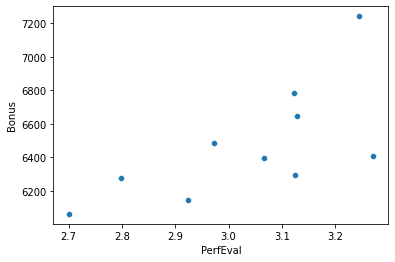

In [21]:
sns.scatterplot(x="PerfEval",y="Bonus",data=glassdoor.groupby("JobTitle").mean())